# Analysis of Natural Disasters in US over Time

## Ritvik Varkhedkar and Thomas Klaus

## Introduction

Natural Disasters, A powerful, uncontrollable force of nature that causes damage and casualties wherever it occurs. Natural Disasters come in many forms - from hurricanes to ice storms, fires, and earthquakes. With the damage and destruction caused by Natural Disasters, it is essential to analyze and find trends in data to prevent damage caused by future storms.
In this project:
1) we aim to analyze a data set of Natural Disasters (obtained from https://www.kaggle.com/headsortails/us-natural-disaster-declarations )

2) Look for patterns or trends in many visual forms - graphs, maps

3) Look at potential correlating factors

4) provide a replicable tutorial so that one can come up with their conclusions


## Required Libraries
Here we are going to import some libraries that will be important

In [83]:
# Imports
import requests #Used to grab html code from websites
import pandas as pd #Used to create Dataframes, tables, and etc
import numpy as np #Used to do some calculations
import matplotlib.pyplot as plt # Used to create plots
import random #Used to generate a random number

## Initial Data set analysis

It is important to understand what data we are reading, below is the head of the data set that we will be using for our analysis of Natural Disasters

In [84]:
df = pd.read_csv("us_disaster_declarations.csv")
df.head()

,fema_declaration_string,disaster_number,state,declaration_type,declaration_date,fy_declared,incident_type,declaration_title,ih_program_declared,ia_program_declared,...,incident_begin_date,incident_end_date,disaster_closeout_date,fips,place_code,designated_area,declaration_request_number,hash,last_refresh,id
0,DR-1-GA,1,GA,DR,1953-05-02T00:00:00Z,1953,Tornado,Tornado,0,1,...,1953-05-02T00:00:00Z,1953-05-02T00:00:00Z,1954-06-01T00:00:00Z,13000,0,Statewide,53013,bb121323c9c29d3bef0c9a3f134bfd8b5ecff148,2021-07-13T23:01:19Z,60c3b7a9a0ee349d71025780
1,DR-2-TX,2,TX,DR,1953-05-15T00:00:00Z,1953,Tornado,Tornado & Heavy Rainfall,0,1,...,1953-05-15T00:00:00Z,1953-05-15T00:00:00Z,1958-01-01T00:00:00Z,48000,0,Statewide,53003,c879557e78d059e6847e7688388c339d10f51979,2021-07-13T23:01:19Z,60c3b7a9a0ee349d71025783
2,DR-3-LA,3,LA,DR,1953-05-29T00:00:00Z,1953,Flood,Flood,0,1,...,1953-05-29T00:00:00Z,1953-05-29T00:00:00Z,1960-02-01T00:00:00Z,22000,0,Statewide,53005,4fb19699fdbba1387ffa2263fcc4a4e37a1de6d6,2021-07-13T23:01:19Z,60c3b7a9a0ee349d71025777
3,DR-4-MI,4,MI,DR,1953-06-02T00:00:00Z,1953,Tornado,Tornado,0,1,...,1953-06-02T00:00:00Z,1953-06-02T00:00:00Z,1956-02-01T00:00:00Z,26000,0,Statewide,53004,87a0c1dd5da249767f545e0c0a43f917e4e9ca83,2021-07-13T23:01:19Z,60c3b7a9a0ee349d7102577a
4,DR-5-MT,5,MT,DR,1953-06-06T00:00:00Z,1953,Flood,Floods,0,1,...,1953-06-06T00:00:00Z,1953-06-06T00:00:00Z,1955-12-01T00:00:00Z,30000,0,Statewide,53006,954449c15634fb45c8bea3ac975782793ccde050,2021-07-13T23:01:19Z,60c3b7a9a0ee349d71025774


Looking at this table, we can notice a bunch of categories, the most important ones to us are:

1) fema_declaration_string - This identifies what the disaster was. Sort of like a name

2) state - tells us the state it was issued in

3) fy_declared - tells us the year it was declared in

4) incident_type - tells us what the disaster was

The rest of the information is not really important to us, so we will remove that from our data set to during
our cleaning process



## Initial Cleaning
Here we are cleaning up the data set. What we are going to do is remove some Natural Disasters that we feel are not climate related,

Ex: Terrorism, Chemical. 

Another thing we are going to do is remove some columns that we are not going to use. This way we can run code much more efficiently.

In [85]:
df = pd.read_csv("us_disaster_declarations.csv")
df.head()

# Removing types of disaster unrelated to climate change:
unrelated_types = ['Fishing Losses','Other', 'Volcano', 'Toxic Substances', 'Dam/Levee Break','Human Cause', 'Terrorist', 'Chemical', 'Biological']

u_rows = []
# For loop will loop through each row and keep track with a list which rows are unrelated
for index, row in df.iterrows():
    if row.incident_type  in unrelated_types:
        u_rows.append(index)

#Here are the names of columns in the original table, that we do not need
garbage = ['designated_area','hash','place_code','declaration_request_number','last_refresh','id','ih_program_declared','ia_program_declared','pa_program_declared','hm_program_declared','fips']

# Dropping rows of unrelated types
df = df.drop(u_rows)
df = df.drop(garbage, 1)

# This prints out the head to show what we have done
df.head()

,fema_declaration_string,disaster_number,state,declaration_type,declaration_date,fy_declared,incident_type,declaration_title,incident_begin_date,incident_end_date,disaster_closeout_date
0,DR-1-GA,1,GA,DR,1953-05-02T00:00:00Z,1953,Tornado,Tornado,1953-05-02T00:00:00Z,1953-05-02T00:00:00Z,1954-06-01T00:00:00Z
1,DR-2-TX,2,TX,DR,1953-05-15T00:00:00Z,1953,Tornado,Tornado & Heavy Rainfall,1953-05-15T00:00:00Z,1953-05-15T00:00:00Z,1958-01-01T00:00:00Z
2,DR-3-LA,3,LA,DR,1953-05-29T00:00:00Z,1953,Flood,Flood,1953-05-29T00:00:00Z,1953-05-29T00:00:00Z,1960-02-01T00:00:00Z
3,DR-4-MI,4,MI,DR,1953-06-02T00:00:00Z,1953,Tornado,Tornado,1953-06-02T00:00:00Z,1953-06-02T00:00:00Z,1956-02-01T00:00:00Z
4,DR-5-MT,5,MT,DR,1953-06-06T00:00:00Z,1953,Flood,Floods,1953-06-06T00:00:00Z,1953-06-06T00:00:00Z,1955-12-01T00:00:00Z


## Removing Duplicate Disasters
So one more thing we have to do when cleaning the data set up is removing duplicate disasters. This is important because one hurricane/storm/etc ,for instance, can impact multiple states, and thus be added multiple times to the data set.

In [86]:
#This initial drop, will remove any rows that are identical
disaster_nums = df['disaster_number'].drop_duplicates()

#Here what we do is we go through the dataframe and add the index's of any repeated disaster
num = 0
disaster_nums = disaster_nums.to_list()
repeated_disasters = []

for index, row in df.iterrows(): #This goes through all the rows of a dataframe
    if num > len(disaster_nums) - 1:
        repeated_disasters.append(index) 
    elif row.disaster_number != disaster_nums[num]:
        repeated_disasters.append(index)
    else:
        num += 1

df = df.drop(repeated_disasters) #This removes all the repeated dataframe indexes that were appended above
df.head()

,fema_declaration_string,disaster_number,state,declaration_type,declaration_date,fy_declared,incident_type,declaration_title,incident_begin_date,incident_end_date,disaster_closeout_date
0,DR-1-GA,1,GA,DR,1953-05-02T00:00:00Z,1953,Tornado,Tornado,1953-05-02T00:00:00Z,1953-05-02T00:00:00Z,1954-06-01T00:00:00Z
1,DR-2-TX,2,TX,DR,1953-05-15T00:00:00Z,1953,Tornado,Tornado & Heavy Rainfall,1953-05-15T00:00:00Z,1953-05-15T00:00:00Z,1958-01-01T00:00:00Z
2,DR-3-LA,3,LA,DR,1953-05-29T00:00:00Z,1953,Flood,Flood,1953-05-29T00:00:00Z,1953-05-29T00:00:00Z,1960-02-01T00:00:00Z
3,DR-4-MI,4,MI,DR,1953-06-02T00:00:00Z,1953,Tornado,Tornado,1953-06-02T00:00:00Z,1953-06-02T00:00:00Z,1956-02-01T00:00:00Z
4,DR-5-MT,5,MT,DR,1953-06-06T00:00:00Z,1953,Flood,Floods,1953-06-06T00:00:00Z,1953-06-06T00:00:00Z,1955-12-01T00:00:00Z


## Mapping the Natural Disaster across the US in an interactive map

A cool thing we can now do with this Data set is Visualize it on an Interactive Map! However, in order to map these disasters on an interactive map , we need to know the longitude and latitude of the locations. However, we are NOT given this, so what we can do is go onto a website like 

https://www.latlong.net/category/states-236-14.html

To ensure that this website doesn't go down or reject our query request, I have copied the html file onto my personal github:

https://rvark2002.github.io/Stateswithlatlong.html

We will use this to grab our State latitude and longitude and pull the data from a table on there directly. The table on that site contains the state name and the longitude and latitude of the middle of the state. Though this may not be 100% a pinpoint location of the storm, there is not much of a better option without having a proper database which stores latitude and longitude of counties.

## Pulling the State data

Here we are going to send a request to the website with latitudes and longitudes (my webpage). We are then going to find the table that is used to store the information. However, we need to do a little bit of html cleaning in order to grab the appropriate table

In [87]:
from bs4 import BeautifulSoup
import pandas as pd
import numpy
import requests
import datetime

r = requests.get("https://rvark2002.github.io/Stateswithlatlong.html") #Sends a request to the website

root = BeautifulSoup( r.content, 'html.parser') #This parses the html that was grabebd from the request above

data = root.find("body").find("main").findAll("table") #This searches for the a table inside the dataframe

data = str(data)
data = data[2500:] #We do this so we can pinpoint the exact table we need. 2500 was obtained through trial and error

state_table = pd.read_html(str(data)) #This converts the html table into a data frame with State, Latitude, Longitude

print(state_table)

[               Place Name   Latitude   Longitude
0          Wisconsin, USA  44.500000  -89.500000
1      West Virginia, USA  39.000000  -80.500000
2        Vermont, the USA  44.000000  -72.699997
3          Texas, the USA  31.000000 -100.000000
4    South Dakota, the US  44.500000 -100.000000
5    Rhode Island, the US  41.700001  -71.500000
6          Oregon, the US  44.000000 -120.500000
7           New York, USA  43.000000  -75.000000
8   New Hampshire, the US  44.000000  -71.500000
9        Nebraska, the US  41.500000 -100.000000
10         Kansas, the US  38.500000  -98.000000
11    Mississippi, the US  33.000000  -90.000000
12          Illinois, USA  40.000000  -89.000000
13       Delaware, the US  39.000000  -75.500000
14    Connecticut, the US  41.599998  -72.699997
15       Arkansas, the US  34.799999  -92.199997
16           Indiana, USA  40.273502  -86.126976
17          Missouri, USA  38.573936  -92.603760
18           Florida, USA  27.994402  -81.760254
19            Nevad

## Modifying the table

Unfortunately for us, the Location in the table above is not in the state abbreviation format that we want so our next task is to fix that

In [88]:
from bs4 import BeautifulSoup
import pandas as pd
import numpy
import requests
import datetime
import folium

r = requests.get("https://rvark2002.github.io/Stateswithlatlong.html")

root = BeautifulSoup( r.content, 'html.parser')

data = root.find("body").find("main").findAll("table")

data = str(data)
data = data[2500:]

state_table = pd.read_html(str(data))

state_df = state_table[0] 
state_to_abbrev = { #Here is a dictionary of all of the US States and their respective State Abbreviation
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
}

#This loop here will go through the state data frame and replace the state name with the State abbreviation
for i, row in state_df.iterrows():
    s = str(state_df.at[i,'Place Name'])   
    s = s[0:s.index(",")];
    state_df.at[i,'Place Name'] = state_to_abbrev[s]
    
print(state_df)

   Place Name   Latitude   Longitude
0          WI  44.500000  -89.500000
1          WV  39.000000  -80.500000
2          VT  44.000000  -72.699997
3          TX  31.000000 -100.000000
4          SD  44.500000 -100.000000
5          RI  41.700001  -71.500000
6          OR  44.000000 -120.500000
7          NY  43.000000  -75.000000
8          NH  44.000000  -71.500000
9          NE  41.500000 -100.000000
10         KS  38.500000  -98.000000
11         MS  33.000000  -90.000000
12         IL  40.000000  -89.000000
13         DE  39.000000  -75.500000
14         CT  41.599998  -72.699997
15         AR  34.799999  -92.199997
16         IN  40.273502  -86.126976
17         MO  38.573936  -92.603760
18         FL  27.994402  -81.760254
19         NV  39.876019 -117.224121
20         ME  45.367584  -68.972168
21         MI  44.182205  -84.506836
22         GA  33.247875  -83.441162
23         HI  19.741755 -155.844437
24         AK  66.160507 -153.369141
25         TN  35.860119  -86.660156
2

## Plotting the points (2017-2020)!

Great now that we have redid the table so that its in state abbreviation form, lets plot our points! 

We are going to use foliums map tool to create this

In [89]:

#We are going to plot all of the Natural Disasters from the years 2017-2020. We chose this 4 year 
#time frame because if we plotted a large data set, the code would lag due to the amount of data.

MAP_YEAR = 2017 #Change the value here if you want to see a different range from X to 2021
#Dictionary of all weather types and color code. This will help us to differentiate the different disaster types
weather_to_color = {
    "Coastal Storm": 'darkblue',
    "Drought": 'orange',
    'Earthquake': 'green',
    'Fire': 'red',
    'Flood': 'purple',
    'Freezing': 'darkpurple',
    'Hurricane': 'pink',
    'Mud/Landslide': 'beige',
    'Severe Ice Storm': 'blue',
    'Severe Storm(s)': 'lightgray',
    'Snow': 'white',
    'Tornado': 'lightred',
    'Tsunami': 'cadetblue',
    'Typhoon': 'lightblue',
    
}

map_osm = folium.Map(location=[39.29, -76.61], zoom_start=5) #This is simply our initial map view/zoom

for index,row in df.iterrows():
        if df.at[index,'fy_declared'] > MAP_YEAR: 
            
            #This grabs the color that will be used when plotting. This is based on the dictionary above
            color = weather_to_color[df.at[index,'incident_type']]
            
            #This just grabs the state name for convenience
            state = df.at[index,'state']
            
            #This description above will be what is shown once it is clicked upon
            desc = 'Incident: '+df.at[index,'incident_type']+'\nState: '+state+'\nDate: '+df.at[index,'declaration_date']+'\nFema Declaration '+df.at[index,'fema_declaration_string'] 
            
            
            lat = "15" #random value - changed anyway
            long = "145" #random value - changed anyway
            
            randomval1 = random.uniform(-1.25,1.25)
            randomval2 = random.uniform(-1.25,1.25)
            #these two random values are to prevent clutter since values will all start at middle of state
            #What we will do is add the latitude and longitude randomly by this value (x,y)
        
            for j,r in state_df.iterrows():
                if state_df.at[j,'Place Name'] == state:
                    lat = str(float(state_df.at[j,'Latitude']) + randomval1)
                    long = str(float(state_df.at[j,'Longitude']) + randomval2)
            folium.Marker(
            location=[lat,long],
            popup=str(desc),
            icon=folium.Icon(color=color),
            ).add_to(map_osm)
       

map_osm     #This command will run the map

## Analysis of Visualization

Now that we can see the map above, here are somethings one can analyze just by looking at it

1) Fires are most common on west coast

2) Hurricanes are very common on east coast, especially south east

3) Flooding appears most along states that border a lake or a river 

Alot more can be analyzed by looking at maps like this. One can even look at different time periods or single out a disaster. 

Lets look at a map of Severe Ice Storms in the US over time


## Case Study: Severe Ice Storms in US Over Time (1953-2020)

Here we are going to look at Severe Ice Storms from 1953-2020. This code will look quite similar to what we did minus a couple parameters. The reason we should look at Ice Storms is because in theory, they should be the most temperature dependent feature, as ice only forms in freezing temperatures. This will play a bigger role below


In [90]:

MAP_YEAR = 1953 #Starting year is 1953
map_osm = folium.Map(location=[39.29, -76.61], zoom_start=4) #This is simply our initial map view/zoom


for index,row in df.iterrows():
        if df.at[index,'fy_declared'] > MAP_YEAR: 
            if df.at[index,'incident_type'] == 'Severe Ice Storm': #This check will ensure only severe ice storms are plotted
            
                #This grabs the color that will be used when plotting
                color = 'blue'
            
                #This just grabs the state name for convenience
                state = df.at[index,'state']
            
                #This description above will be what is shown once it is clicked upon
                desc = 'Incident: '+df.at[index,'incident_type']+'\nState: '+state+'\nDate: '+df.at[index,'declaration_date']+'\nFema Declaration '+df.at[index,'fema_declaration_string'] 
            
                lat = "15" #random value - changed anyway
                long = "145" #random value - changed anyway
            
                randomval1 = random.uniform(-1.25,1.25)
                randomval2 = random.uniform(-1.25,1.25)
                #these two random values are to prevent clutter since values will all start at middle of state
                #What we will do is add the latitude and longitude randomly by this value (x,y)
        
                for j,r in state_df.iterrows():
                    if state_df.at[j,'Place Name'] == state:
                        lat = str(float(state_df.at[j,'Latitude']) + randomval1)
                        long = str(float(state_df.at[j,'Longitude']) + randomval2)
                folium.Marker(
                location=[lat,long],
                popup=str(desc),
                icon=folium.Icon(color=color),
                ).add_to(map_osm)
       

map_osm     #This command will run the map

From looking at the map above we can notice a few things.
1) Severe Ice Storms are almost non existant on the West Coast of America/Alaska

2) The incidents a primarily declared in middle america around Kansas/Oklahoma/Missouri

3) An interesting observation is that typical cold places like Alaska have no declarations there

This same idea can be applied to all of the other types of natural disasters

## Which states are the most prone to Natural Disasters? 

Lets see if any states are more disaster prone than others!

       0     1
6  other  3008
0     TX   357
2     CA   348
3     OK   197
5     WA   182
1     FL   159
4     OR   136


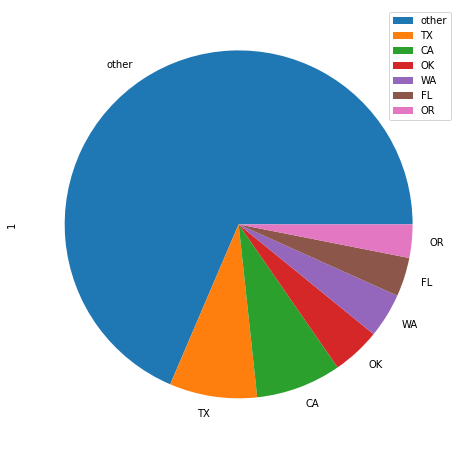

In [94]:
state_disaster_dict = {} #This creates a dictionary in which we can store the number of disasters in that state

for i,row in df.iterrows(): #This will go through the data frame and tally the number of disasters per state
    state = df.at[i,'state']
    if state in state_disaster_dict:
        state_disaster_dict[state] = state_disaster_dict[state] + 1
    else:
        state_disaster_dict[state] = 1
        
#print(state_disaster_dict)

#What we should do now is combine all the states that have less than 100 disasters into an other category

cleaned_dict = {} #remove all ones less than 100 and put in other category
other = 0
for elem in state_disaster_dict.keys():
    if state_disaster_dict[elem] <= 100:
        other += state_disaster_dict[elem]
    else:
        cleaned_dict[elem] = state_disaster_dict[elem]

cleaned_dict['other'] = other       
sdf = pd.DataFrame(cleaned_dict.items())
sdf = sdf.sort_values(by=[1],ascending=False)
plot = sdf.plot.pie(y=1,labels = sdf[0],figsize=(8, 8))
plot
print(sdf)

Looking at the totals above, we can tell that Texas has had the most disasters from 1953-2021, however lets take a closer look by analyzing this based on time periods.

## Which states are the most prone to Natural Disasters? (1953-1970)  (1971-1988) (1988-2005) (2006-2021)

1953 - 1970
        0    1
12  other  163
0      TX   17
3      CA   16
1      IA   10
5      WV    9
6      NY    9
9      KY    9
10     AR    9
2      FL    8
4      NV    8
7      NC    8
8      ID    8
11     MN    8
1971 - 1988
       0    1
6  other  510
1     CA   35
4     TX   31
0     OK   24
2     OR   22
5     LA   22
3     MS   21
1989 - 2005
        0    1
12  other  791
0      TX  153
6      FL   84
4      CA   78
1      WA   53
3      CO   41
9      AZ   41
5      AL   40
11     NV   39
7      OR   36
10     NY   34
8      OK   32
2      ME   31
2006 - 2021
        0    1
12  other  980
0      CA  218
4      TX  156
3      OK  134
9      WA  103
8      OR   72
1      FL   48
11     MT   48
10     AZ   47
5      NM   46
7      NV   43
2      KS   42
6      CO   42


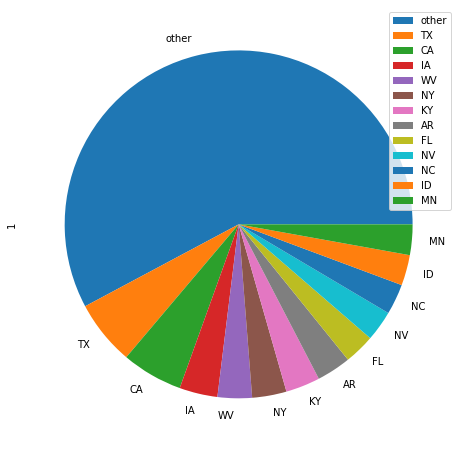

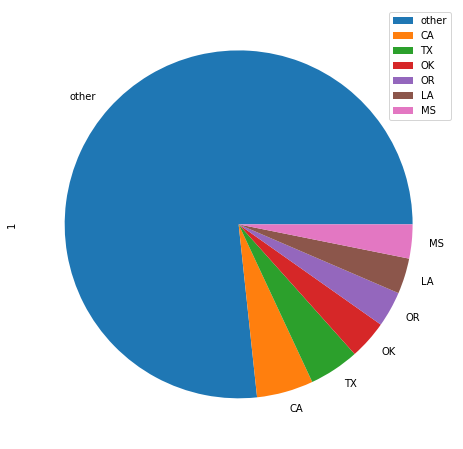

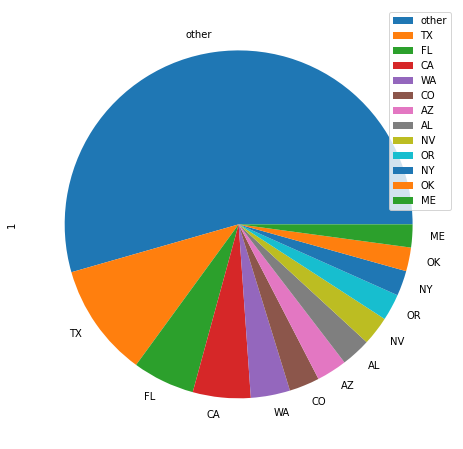

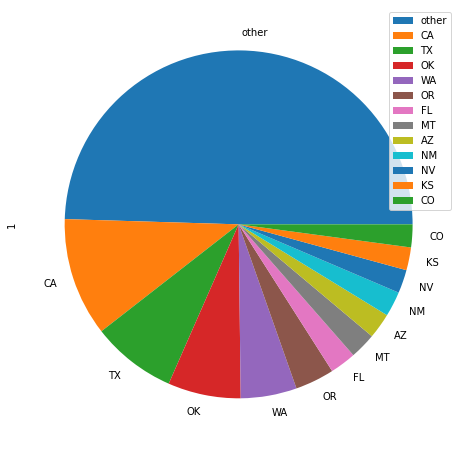

In [102]:
#====================
#1953 - 1970
#====================
state_disaster_dict = {} #This creates a dictionary in which we can store the number of disasters in that state
max = 1970 #This is our min and max value that we change as it goes on
min = 1953
val = 7
for i,row in df.iterrows(): #This will go through the data frame and tally the number of disasters per state
    state = df.at[i,'state']
    if df.at[i,'fy_declared'] >= min and df.at[i,'fy_declared'] <= max:
        if state in state_disaster_dict:
            state_disaster_dict[state] = state_disaster_dict[state] + 1
        else:
            state_disaster_dict[state] = 1

cleaned_dict = {} 
other = 0
for elem in state_disaster_dict.keys():
    if state_disaster_dict[elem] <= val:
        other += state_disaster_dict[elem]
    else:
        cleaned_dict[elem] = state_disaster_dict[elem]

cleaned_dict['other'] = other       
sdf = pd.DataFrame(cleaned_dict.items())
sdf = sdf.sort_values(by=[1],ascending=False)
plot = sdf.plot.pie(y=1,labels = sdf[0],figsize=(8, 8))
plot
print('1953 - 1970')
print(sdf)

#====================
#1971 - 1988
#====================
state_disaster_dict = {} #This creates a dictionary in which we can store the number of disasters in that state
max = 1988
min = 1971
val = 20
for i,row in df.iterrows(): #This will go through the data frame and tally the number of disasters per state
    state = df.at[i,'state']
    if df.at[i,'fy_declared'] >= min and df.at[i,'fy_declared'] <= max:
        if state in state_disaster_dict:
            state_disaster_dict[state] = state_disaster_dict[state] + 1
        else:
            state_disaster_dict[state] = 1
cleaned_dict = {}
other = 0
for elem in state_disaster_dict.keys():
    if state_disaster_dict[elem] <= val:
        other += state_disaster_dict[elem]
    else:
        cleaned_dict[elem] = state_disaster_dict[elem]
cleaned_dict['other'] = other       
sdf = pd.DataFrame(cleaned_dict.items())
sdf = sdf.sort_values(by=[1],ascending=False)
plot = sdf.plot.pie(y=1,labels = sdf[0],figsize=(8, 8))
plot
print('1971 - 1988')
print(sdf)
#====================
#1989 - 2005
#====================
state_disaster_dict = {}
max = 2005
min = 1989
val = 30
for i,row in df.iterrows(): #This will go through the data frame and tally the number of disasters per state
    state = df.at[i,'state']
    if df.at[i,'fy_declared'] >= min and df.at[i,'fy_declared'] <= max:
        if state in state_disaster_dict:
            state_disaster_dict[state] = state_disaster_dict[state] + 1
        else:
            state_disaster_dict[state] = 1
cleaned_dict = {} 
other = 0
for elem in state_disaster_dict.keys():
    if state_disaster_dict[elem] <= val:
        other += state_disaster_dict[elem]
    else:
        cleaned_dict[elem] = state_disaster_dict[elem]

cleaned_dict['other'] = other       
sdf = pd.DataFrame(cleaned_dict.items())
sdf = sdf.sort_values(by=[1],ascending=False)
plot = sdf.plot.pie(y=1,labels = sdf[0],figsize=(8, 8))
plot
print('1989 - 2005')
print(sdf)

#====================
#2006 - 2021
#====================
state_disaster_dict = {}
max = 2021
min = 2006
val = 40

for i,row in df.iterrows(): #This will go through the data frame and tally the number of disasters per state
    state = df.at[i,'state']
    if df.at[i,'fy_declared'] >= min and df.at[i,'fy_declared'] <= max:
        if state in state_disaster_dict:
            state_disaster_dict[state] = state_disaster_dict[state] + 1
        else:
            state_disaster_dict[state] = 1

cleaned_dict = {} 
other = 0
for elem in state_disaster_dict.keys():
    if state_disaster_dict[elem] <= val:
        other += state_disaster_dict[elem]
    else:
        cleaned_dict[elem] = state_disaster_dict[elem]

cleaned_dict['other'] = other       
sdf = pd.DataFrame(cleaned_dict.items())
sdf = sdf.sort_values(by=[1],ascending=False)
plot = sdf.plot.pie(y=1,labels = sdf[0],figsize=(8, 8))
plot
print('2006 - 2021')
print(sdf)

Pie Charts Analyzed - 

When comparing the 5 pie charts (including total one above) next to each other, we can see that Texas and California were both consistently the two states with the most disasters. However, Disasters seem to be increasing dramatically in recent years. Take Texas for instance, in the 1953-1971 it received less than 20 disasters, while 156 in 2006-2021. Texas is not the only state seeing this trend. Lets look at this closer

## Natural Disaster Totals Per Year

Here lets now look at Natural Disasters over time now. Lets start by obtaining the Natural Disaster totals per year

In [103]:
# Getting number of natural disasters per year: 

pdf = pd.DataFrame(df,columns=['fy_declared','incident_type'])

pdf = pdf.rename(columns={'fy_declared':'year','incident_type':'type'})

pdf['dummy'] = np.ones(len(df)) # Changed this to len(df) for it to be more dynamic

pdf = pdf.groupby(by=['year','type']).count().unstack() #This adds up the disasters per year, most important line!

#This part is so that we can get rid of the outer part of the dataframe,
#and filling all empty spots with 0
pdf = pdf['dummy']
pdf = pdf.fillna(0) 

#This is to add the sum of all the rows together
pd.set_option('display.max_rows', df.shape[0]+1)

if 'totals' in pdf.columns:
    pdf = pdf.drop('totals',1)
totals = []
for index, row in pdf.iterrows():
    t = 0
    for i in row:
        t += i
    totals.append(int(t))
    
pdf['totals'] = totals

pdf.tail()


type,Coastal Storm,Drought,Earthquake,Fire,Flood,Freezing,Hurricane,Mud/Landslide,Severe Ice Storm,Severe Storm(s),Snow,Tornado,Tsunami,Typhoon,totals
year,,,,,,,,,,,,,,,
2018,3.0,0.0,0.0,70.0,18.0,0.0,18.0,1.0,0.0,16.0,3.0,1.0,0.0,3.0,133
2019,1.0,0.0,3.0,17.0,29.0,0.0,17.0,0.0,0.0,28.0,0.0,2.0,0.0,3.0,100
2020,1.0,0.0,3.0,88.0,6.0,0.0,22.0,0.0,0.0,23.0,0.0,3.0,0.0,2.0,148
2021,1.0,0.0,0.0,47.0,8.0,0.0,32.0,1.0,12.0,14.0,1.0,1.0,0.0,0.0,117
2022,0.0,0.0,0.0,2.0,2.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8


## Plotting Total Number of Natural Disasters over Time

Here we are going to plot the total number of Natural Disasters over Time. This can be easily be done by using the totals column that we made in the previous bit of code

<AxesSubplot:title={'center':'Total Number of Natural Disasters per Year'}, xlabel='year', ylabel='totals'>

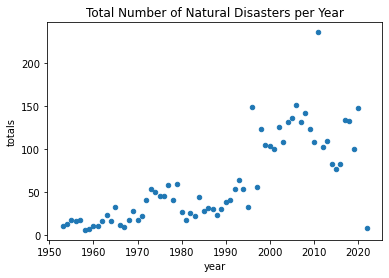

In [104]:
years = range(1953,2023)
pdf['year'] = years

#Removed due to incomplete data
pdf.drop(pdf[pdf['year'] ==2021].index, inplace = True)
pdf.plot(x = 'year', y = 'totals', kind='scatter',title= 'Total Number of Natural Disasters per Year')

## Linear Regression of Total Number of Natural Disasters over Time

To better understand the scatterplot above, lets run a linear regression model on it and plot the line

1.9214309482435339x -3756.0270830142244


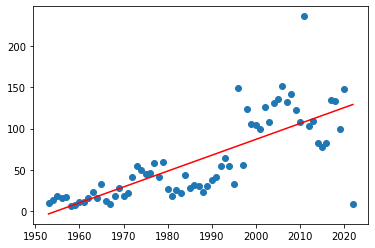

In [105]:
#We need to make 3 new imports to help us run some regression models
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

x = pdf['year'].values.reshape(-1, 1)
y = pdf['totals'].values.reshape(-1, 1)
reg = LinearRegression()
reg.fit(x, y)
y_pred = reg.predict(x)
print (str(reg.coef_[0][0])+ 'x '+ str(reg.intercept_[0])) #This prints the linear equation out
plt.scatter(x,y)
plt.plot(x, y_pred, color='red')

As you can see above, the amount of Natural Disasters in the US is increasing over time. 

What could be causing this increase? We will look into it more below. But first lets look at these disasters individually

## Plotting a Polynomial regression of the total number of each Disaster Type by Year 

For the next part, instead of running a linear regression which may not be helpful on these scatterplots, lets run a polynomial regression to the 5th degree. We should also run it on each of the different disasters to study/analyze independent trends.

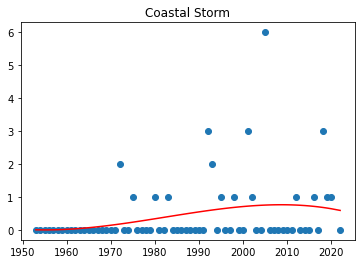

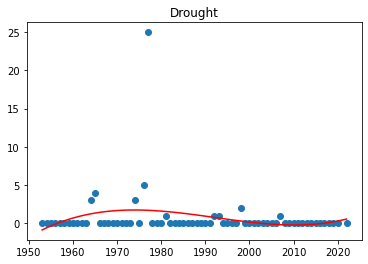

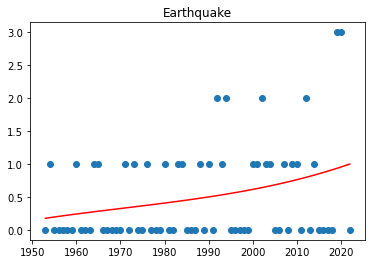

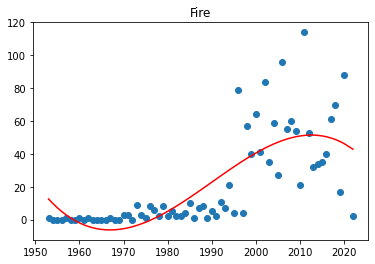

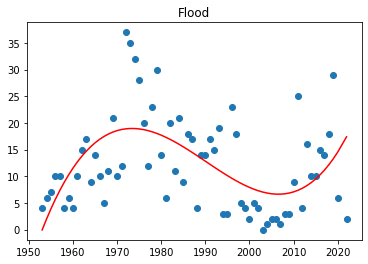

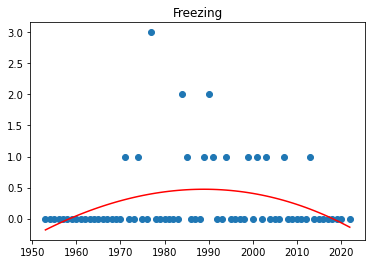

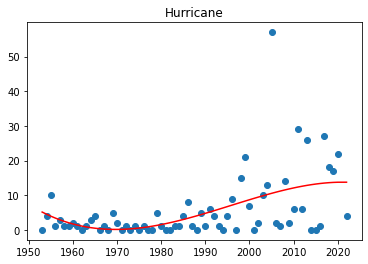

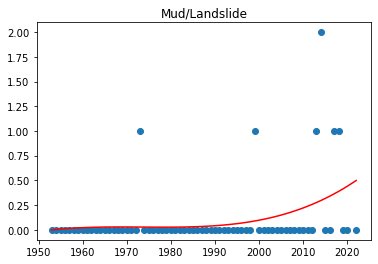

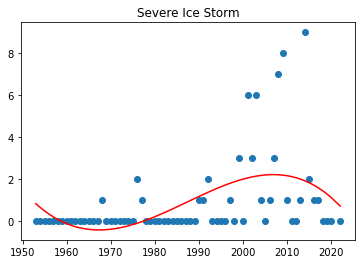

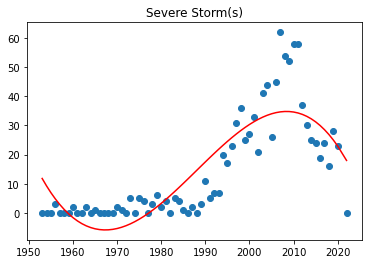

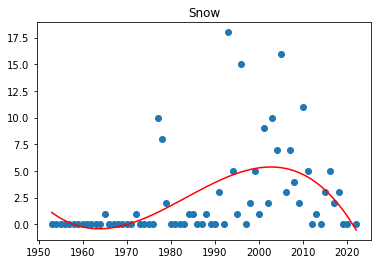

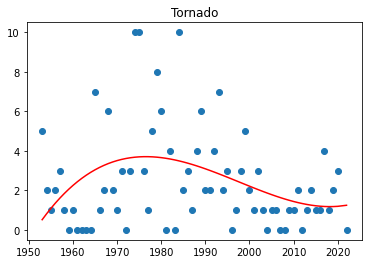

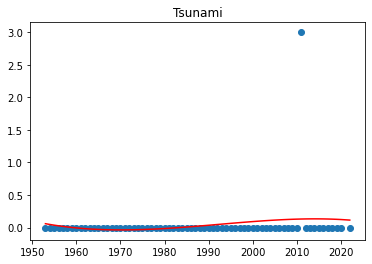

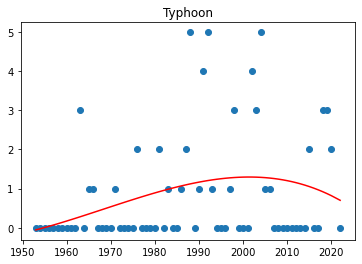

In [106]:
#This loop will go through each column. However since year and totals is also a column in our dataframe, we
# should just ignore them.
for elem in pdf:
    if elem != 'totals' and elem != 'year':
        x = pdf['year'].values.reshape(-1, 1)
        y = pdf[elem].values.reshape(-1, 1)
        degree = 5 #This gets our degree
        reg=make_pipeline(PolynomialFeatures(degree),LinearRegression()) #This runs the polynomial regression
        reg.fit(x, y)
        y_pred = reg.predict(x)
        plt.title(elem)
        plt.scatter(x,y)
        plt.plot(x, y_pred, color='red')
        plt.show()



## Analysis of Graphs

So here we have our graphs of all the Disasters over time.

Lets look at this independently:

1) Coastal Storm - Increasing over time

2) Drought - Decreasing over time

3) Earthquake - Increasing over time

4) Fire - Increasing over time, however seems to be leveling off?

5) Flood - Increased, then decreased, then appears to be once again on the rise

6) Freezing - Increased, but then began to decrease since the 90's

7) Hurricane - Increasing over time

8) Mud/landslide - Increasing in recent years

9) Severe Ice Storms - Was increasing for a period, with some strong storms pulling the data up, however over all trend seems to be decreasing now.

10) Severe Storms - was increasing quite a bit, was also pulled up by some high frequencies of storms in the 2000's however seems to be decreasing in modern years

11) Snow - was increasing until it hit a sharp decline in the mid 2000's

12) Tornado's have been decreasing since the 80's

13) Tsunami graph- only has 1 data point, so no real analysis can be drawn

14) Typhoon - Was increasing until the mid 2000's, but is now decreasing

When looking at these graphs one can raise many questions about their trends. For instance the Freezing/Snow related storms seem to all be on the decline, while coastal storms, hurricane like storms seem to be on the incline. 

What factors could be causing this change? One possibility could be rising temperatures due to climate change. We will analyze that below


## Correlation Between Temperature and Natural Disaster

We have all heard scientists on the news warning us on how climate change will increase the frequency and severuty of natural disasters. Therefore, for this next part we will be observing how the number of natural disasters and change in temperature over time correlate with each other. 

Observing the correlation between temperature and number of natural disasters might be more productive than solely connecting number of natural disasters with time. Time is a variable which can only increase, therefore, making time not suitable of a variable for the number of natural disasters to depend on. Temperature on the other hand cannot solely increase, as well as having scientific background in regards to global warming, which makes it more significant variable which can affects the number of natural disasters per year.

Now, to look at the correlation between temperature and number of natural disasters.

We will be using the average temperature by year dataset provided by the "NOAA National Centers for Environmental information" from: https://www.ncdc.noaa.gov/cag/national/time-series/110/tavg/12/1/1953-2021?base_prd=true&begbaseyear=1901&endbaseyear=2000

In [107]:
us_temp = pd.read_csv("110-tavg-12-1-1953-2021.csv")
us_temp.head()

,Date,Value,Anomaly
0,195301,52.64,0.62
1,195401,52.90,0.88
2,195501,53.20,1.18
3,195601,51.83,-0.19
4,195701,52.01,-0.01


We will be adding the column with temperatures by year to our previously made dataset: pdf

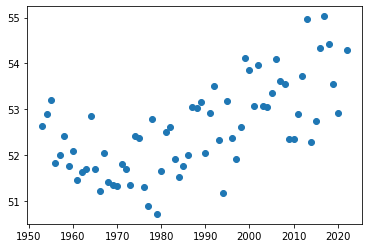

In [108]:
# We will be adding the column with temperatures by year to our previously made dataset: pdf
temps = us_temp['Value'].tolist()
pdf['temps'] = temps # adding new column with temperatures to pdf
x = pdf['year'].values.reshape(-1, 1)
y = pdf['temps'].values.reshape(-1, 1)
plt.scatter(x,y)

We can observe from the plot that the temperatures seem to be continually increasing since the mid 1960s after an initial drop. The temperature has an increasing nature similar to that of number of natural disasters. Now let's quantify the correlation between the fluctuations in temperatre and number of natural disasters by finding the correlation coeficient between the two. There is a function included in pandas which can calculate it.

Reminder that a positive correlation would indicate that as one variable increases, the other does as well, and a negative correlation as one increases, the other decreases.

## Correlation between each natural disaster and temperature

In [109]:
# We will be using a pandas function which can calculate the correlation coeficient between two columns
column_1 = pdf['totals']
column_2 = pdf["temps"]
correlation = column_1.corr(column_2)
print(correlation)

0.5187398771670896


We can see that there exists a positive correlation between the total amount of natural disasters and average temperature by year. 

However, as we can observe from the  previously plotted total number of natural disasters per year by disaster, not every disaster is increasing as time goes by. Therefore, we are now going to calculate the correlation coeficient between the number of natural disasters per year according to each natural disaster type.


In [110]:
# The following two lists will serve to populate a dataframe with the disaster type and te given correlation coeficient
disasters = []
correlations = []
for disaster in pdf:
    if disaster not in ['totals', 'year', 'temps']: # ignoring these columns
        column_1 = pdf[disaster] 
        column_2 = pdf["temps"]
        correlation = column_1.corr(column_2)
        disasters.append(disaster)
        correlations.append(correlation)

d = {'disaster': disasters,'correlation':correlations }  
cor_df = pd.DataFrame.from_dict(d)      
cor_df


,disaster,correlation
0,Coastal Storm,0.245422
1,Drought,-0.235949
2,Earthquake,0.081626
3,Fire,0.545431
4,Flood,-0.294248
5,Freezing,-0.113145
6,Hurricane,0.472132
7,Mud/Landslide,0.272220
8,Severe Ice Storm,0.187172
9,Severe Storm(s),0.458109


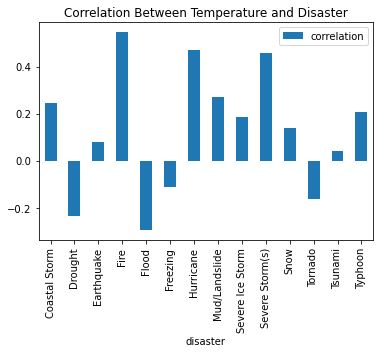

In [111]:
barp = cor_df.plot.bar('disaster', 'correlation',title='Correlation Between Temperature and Disaster')

## Conclusion from the relationship between temperature and number of natural disasters

We can now see each natural disaster and it's correlation with temperature.

1) Coastal Storm - Medium Positive correlation

2) Drought - Negative correlation

3) Earthquake - Negligible  correlation

4) Fire - The Strongest Positive correlation, which intuitively makes sense, hotter temperature would mean more

5) Flood - Negative correlation

6) Freezing - Low Negative correlation

7) Hurricane - Strong Positive correlation

8) Mud/landslide - Positive correlation

9) Severe Ice Storms - Low Positive correlation

10) Severe Storms - Strong Positive correlation

11) Snow - Low Positive correlation

12) Tornado - Low Negative correlation

13) Tsunami - No correlation

14) Typhoon - Positive correlation

Looking at the correlations, we can see that most Natural Disasters seem to be correlated positively with the increase of Temperature over time. However, CORRELATION DOES NOT EQUAL CAUSATION, so we cannot conclude that the increase in temperature is causing Natural Disasters to be more frequent but we can say there appears to be a correlation between the two.

## Limitations of Analysis of Data

No data is ever perfect for analysis. Limitations exist in all data collected and here we are going to talk/speculate about some that may exist in our Data set.

1) How they registered natural disasters over time - In earlier years, natural disasters may not have been stored as accurately as they were in modern years with new technology. The classifications of natural disasters could have changed over time - would a severe storm in 1953 be at the same strength as a severe storm from 2010?

2) Unseen Variables - There are multiple variables at play when it comes to Natural Disasters. Each Natural disaster is quite different and caused by different things. We may see a correlation between one variable and another , but not see a correlation between another two. This does not mean that something like Temperature isnt impacting a certain Natural Disaster.

3) Our Data set may not be big enough - Though, Natural Disasters are catostrophic events with long term ramifications, they do not happen as often as we may expect. Therefore our sample size may be too small to come to appropriate conclusions



# Conclusion

## What we covered in our tutorial:
1) Reading in a CSV file

2) Cleaning/Tidying a Data Frame

3) Scraping Data from a webpage

4) Merging Data Frames

5) Using folium to create Interactive Maps

6) Creating pie charts focused over periods of time

7) Creating Scatterplots

8) Creating Linear Regression Lines and plotting them

9) Creating Polynomial Regression Lines and plotting them

10) Finding and Graphing Correlation Coefficients

## Conclusion of Data Analysis

In our analysis of Natural Disasters we found that certain States seemed to be more prone to certain disasters than others. Including that some Disasters exclusively only happened in certain regions of the US (Fires and West Coast). In making Pie Charts we found that some states like Texas had much more Natural Disasters from 1953-2021 compared to other states. However, upon dividing up the chunk of time into time periods, we found that this was not always the case, and in recent years, there appears to be an uptick of Natural Disasters. When looking at the Totals of Natural Disasters per year through a Linear Regression Model, we could clearly see there was an increase in disasters. Singling out the Disasters, and running Polynomial Regression Models on them showed us that certain Disasters saw an uptick in frequency as time progressed, leading us to believe that there may be something causing this uptick. We then decided to compare the Natural Disasters frequencies to Temperature change in the US. This resulted in us finding a mostly Positive correlation between Natural Disasters and Temperature. Though we cannot conclude that temperature is a causation factor, we can claim there is a correlation between the two. Natural Disasters, will continue to remain a threat to US society, and according to our models, Natural Disasters appear to be becoming more and more frequent.


## Further Reading

1) https://ourworldindata.org/natural-disasters - for more data

2) https://www.thezebra.com/resources/research/natural-disaster-statistics/ - more statistics/data

3) https://www.dosomething.org/us/facts/11-facts-about-disasters - fun article about natural disasters

4) https://www.statista.com/topics/2155/natural-disasters/ - additional stats

5) https://www.ready.gov/kids/disaster-facts - general information about disasters

6) https://www.w3schools.com/python/python_ml_polynomial_regression.asp - help on Polynomial and other kinds of Regression models

7) https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html - For help on Data Frames and its features

8) http://python-visualization.github.io/folium/quickstart.html#Markers - A quick guide to Folium and Map Making/Marking

9) https://datatofish.com/plot-dataframe-pandas/ - Great guide to creating different graphs out of Data frames